In [1223]:
# Execute uma predição utilizando o método KNN e justifique os resultados obtidos.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from datetime import datetime
import missingno as msno
%matplotlib inline

In [4]:
data = pd.read_csv("../data/AirQualityUCI.csv", delimiter=";")

In [5]:
# Limpeza de dados
data = data.replace("-200,0", np.nan)
data = data.replace("-200", np.nan)
data = data.replace(-200, np.nan)
data = data.replace("NaN", np.nan)

# Remover coluna MNHC(GT) porque possui muitos dados em branco
data = data.drop(["NMHC(GT)"], axis=1)

# Remover as 2 ultimas colunas, não possuem dados
data = data.drop(data.columns[[14, 15]], axis=1)

# Drop todos os registros que possuem Nan
data = data.dropna()

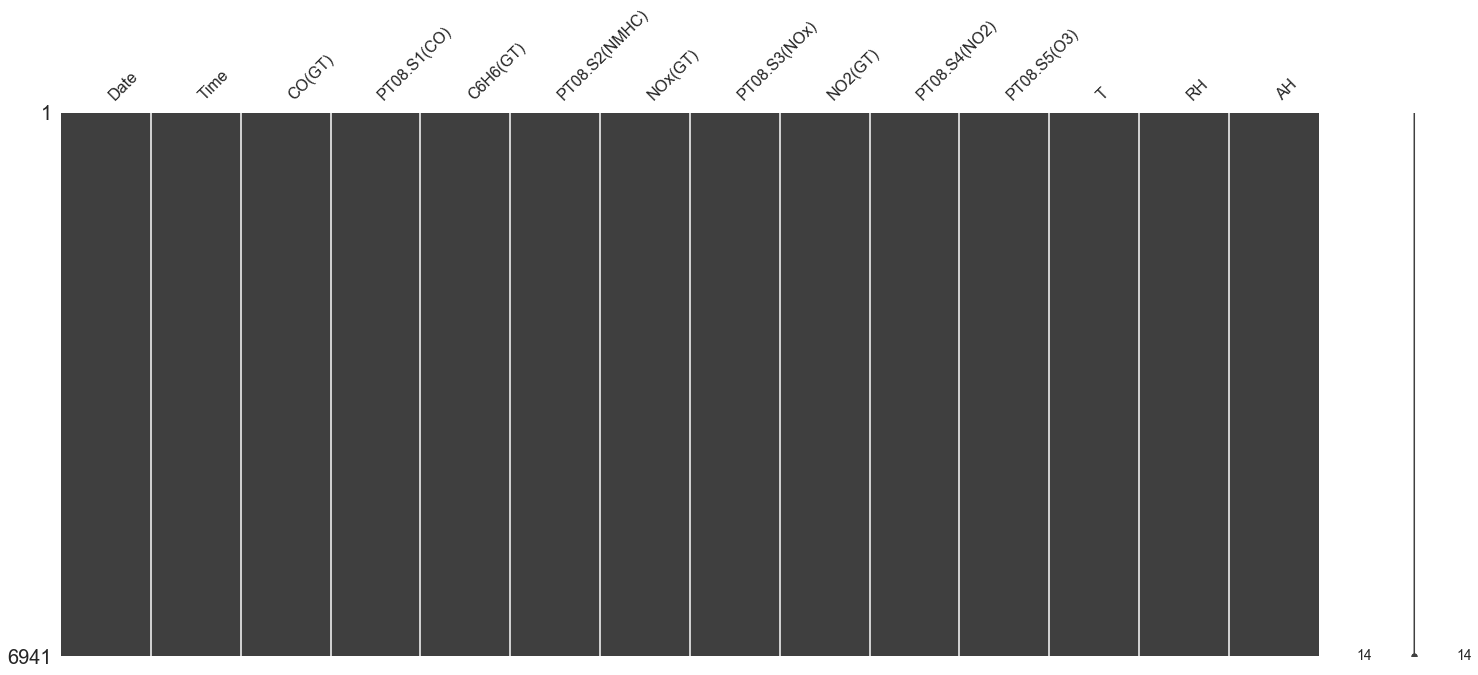

In [6]:
# Visualizar dados limpos
msno.matrix(data)

In [3]:
# timeCo2 = data[['Date', 'CO(GT)']]
interestData = data[['Date', 'CO(GT)', 'T', 'RH']]

In [4]:
interestData['Date_Converted'] = pd.to_datetime(interestData['Date'])
interestData = interestData.drop(['Date'], axis=1)

/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5]:
# Remover registros após 04/2015 (Dados inconsistentes)
interestData = interestData[interestData['Date_Converted'] < pd.to_datetime('2005-04-01')]
interestData = interestData[interestData['Date_Converted'] > pd.to_datetime('2004-03-01')]

In [68]:
# Remover valor -200, possivel erro de leitura
interestData = interestData[interestData['CO(GT)'] != '-200']
interestData = interestData[interestData['CO(GT)'] != '-200,0']

interestData = interestData[interestData['T'] != '-200']
interestData = interestData[interestData['T'] != '-200,0']

interestData = interestData[interestData['RH'] != '-200']
interestData = interestData[interestData['RH'] != '-200,0']

# Remover none
interestData = interestData.dropna()

In [69]:
# Converter o valores de string para float
interestData['CO(GT)'] = interestData['CO(GT)'].str.replace(',', '.', regex=False)

interestData['T'] = interestData['T'].str.replace(',', '.', regex=False)

interestData['RH'] = interestData['RH'].str.replace(',', '.', regex=False)


In [70]:
# Ordenar dados pelo nível de CO2
interestData.sort_values(by=['Date_Converted'])

,CO(GT),T,RH,Date_Converted
558,1.6,17.1,51.8,2004-03-04
560,1.2,15.1,58.2,2004-03-04
561,0.9,15.1,57.6,2004-03-04
562,0.8,14.5,58.0,2004-03-04
563,0.8,13.7,61.6,2004-03-04
565,2,13.3,61.7,2004-03-04
566,3,15.1,55.8,2004-03-04
564,0.9,13.9,59.6,2004-03-04
559,1.3,16.2,54.2,2004-03-04
567,3.1,17.0,50.5,2004-03-04


In [71]:
interestData.keys()

Index(['CO(GT)', 'T', 'RH', 'Date_Converted'], dtype='object')

In [72]:
non_numerical = ['CO(GT)', 'T', 'RH']
le = preprocessing.LabelEncoder()

In [73]:
for x in non_numerical:
    le.fit(interestData[x])
    interestData[x] = le.transform(interestData[x].astype(str))

In [77]:
# criar uma matriz X e o vetor y
X = np.array(interestData.iloc[:, 0:3]) 	# features
y = np.array(interestData['Date_Converted']) 	
y

array(['2004-10-03T00:00:00.000000000', '2004-10-03T00:00:00.000000000',
       '2004-10-03T00:00:00.000000000', ...,
       '2005-03-04T00:00:00.000000000', '2005-03-04T00:00:00.000000000',
       '2005-03-04T00:00:00.000000000'], dtype='datetime64[ns]')

In [81]:
# criação de intervalo de números ímpares de K para KNN
neighbors = list(range(1,50,2))


# criação de intervalo de f para k-fold
cv_list = list(range(10,40))


# criação da estrutura de listas para armazenar valores
k_list = []
fold_list = []
cv_scores = []

cv_list

[10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39]

In [79]:
# importar bibliotecas
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

# executar KNN e k-fold cross validation
for k in neighbors:
  for f in cv_list:
      knn = KNeighborsClassifier(n_neighbors=k)
      scores = cross_val_score(knn, X, y, cv=f, scoring='accuracy')
      cv_scores.append(scores.mean())  #popular listas
      k_list.append(k)                 
      fold_list.append(f) 

/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=11.
  % (min_groups, self.n_splits)), Warning)
/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=12.
  % (min_groups, self.n_split

ValueError: n_splits=25 cannot be greater than the number of members in each class.